<a href="https://colab.research.google.com/github/21287106/21287106_21158805/blob/main/assignment2_nlp-insights_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
Found existing installation: setuptools 68.2.2
Uninstalling setuptools-68.2.2:
  Successfully uninstalled setuptools-68.2.2
  Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.2 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
mlxtend 0.22.0 requires numpy>=1.16.2, which is not installed.
nibabel 4.0.2 requires numpy>=1.17, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, which is not installed.
pandas-gbq 0.17.9 requires numpy>=1.16.6, w

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.


In [2]:
!pip install pyLDAvis

In [3]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models


#Load the dataset in colab



In [5]:
df_twitter = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Twitter')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# display the column names of the datasets
df_twitter.columns



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['twid', 'date', 'time', 'user_id', 'username', 'tweet', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'trans_dest'],
      dtype='object')

In [7]:
print("dataset length:", len(df_twitter))

dataset length: 1896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   twid            1896 non-null   object        
 1   date            1896 non-null   datetime64[ns]
 2   time            1896 non-null   object        
 3   user_id         1896 non-null   int64         
 4   username        1896 non-null   object        
 5   tweet           1895 non-null   object        
 6   replies_count   1896 non-null   int64         
 7   retweets_count  1896 non-null   int64         
 8   likes_count     1896 non-null   int64         
 9   hashtags        1896 non-null   object        
 10  trans_dest      0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 163.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#check for missing values in the dataset

In [9]:
df_twitter.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


twid                 0
date                 0
time                 0
user_id              0
username             0
tweet                1
replies_count        0
retweets_count       0
likes_count          0
hashtags             0
trans_dest        1896
dtype: int64

#replace missing value of trans_dest with 0

In [10]:
df_twitter.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


checking if it's replaced

In [13]:
df_twitter.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


twid              0
date              0
time              0
user_id           0
username          0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
trans_dest        0
dtype: int64

**Preprocessing**

In [16]:
# Transform sentences into lowercase
df_twitter['tweet'] = df_twitter['tweet'].str.lower()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,#bmw criticizes australia over lack of #electr...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could @volkswagen boost #electricvehicle uptak...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,does #australia offer incentives for #electric...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,#electriccars the plug has all but been pulled...,0,0,0,['#electriccars'],0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne to brisbane superchar...,1,14,9,"['#electriccars', '#infrastructure']",0.0


#Regular-expression

In [19]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_twitter_ids)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant the good car company affordable elec...,0,0,0,"['#electriccars', '#nissan']",0.0
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time for australia to wake up or risk becoming...,0,3,2,[],0.0
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,i want to see a stock appearing race car not a...,0,0,0,[],0.0
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,i never thought id be nerding out on car sale ...,0,1,2,['#electricvehicle'],0.0
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia when peugeot is missing out mercedes...,0,0,0,[],0.0


#Remove the digits

In [21]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df_twitter['tweet'] = df_twitter['tweet'].apply(remove_digits)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant the good car company affordable elec...,0,0,0,"['#electriccars', '#nissan']",0.0
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time for australia to wake up or risk becoming...,0,3,2,[],0.0
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,i want to see a stock appearing race car not a...,0,0,0,[],0.0
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,i never thought id be nerding out on car sale ...,0,1,2,['#electricvehicle'],0.0
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia when peugeot is missing out mercedes...,0,0,0,[],0.0


#Duplicate removal

In [22]:
# Check duplicate tweets count
duplicate_count = len(df_twitter['tweet'])-len(df_twitter['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_twitter.shape[0])

duplicate count: 34
total records before remove duplicates: 1896


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# drop duplicates (keep the last tweet of each of the duplicates)
df_twitter = df_twitter.drop_duplicates(subset='tweet', keep="first")
print('updated record count:', df_twitter.shape[0])

updated record count: 1861


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#remove all punctuation

In [86]:
df_twitter['tweet'] = df_twitter['tweet'].str.replace(r'[^\w\s]','')
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem,tweet_lemmatized,sentiment
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,bmw criticizes australia lack electriccar poli...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0,bmw critic australia lack electriccar polici e...,bmw criticizes lack electriccar policy electri...,0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could boost electricvehicle uptake australia e...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0,could boost electricvehicl uptak australia ev ...,could boost uptake pictwittercomaeclqbwiz0,0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,australia offer incentives electricvehicle pur...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0,australia offer incent electricvehicl purchas ev,offer incentive purchase,0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,electriccars plug pulled electric cars australia,0,0,0,['#electriccars'],0.0,electriccar plug pull electr car australia,plug pulled,0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne brisbane supercharger...,1,14,9,"['#electriccars', '#infrastructure']",0.0,tesla finish melbourn brisban supercharg corri...,tesla finish melbourne brisbane supercharger c...,0.0



#Stop words and domain related word removal

In [87]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
print(stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


removing not from the stopword list as this will have a negative impact on sentiment analysis

In [90]:
stop.remove('not')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print(stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df_twitter['tweet'] = df_twitter['tweet'].apply(remove_stop_words)
df_twitter.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem,tweet_lemmatized,sentiment
1891,tw612,2017-02-15,05:33:22,253615321,alexwitzleben,bmw criticizes australia lack electriccar poli...,0,0,0,"['#bmw', '#electriccar', '#electriccar', '#ele...",0.0,bmw critic australia lack electriccar polici e...,bmw criticizes lack electriccar policy electri...,0.0
1892,tw1267,2017-02-08,22:01:04,352630076,climateworksaus,could boost electricvehicle uptake australia e...,0,0,0,"['#electricvehicle', '#australia', '#evs']",0.0,could boost electricvehicl uptak australia ev ...,could boost uptake pictwittercomaeclqbwiz0,0.0
1893,tw1268,2017-01-19,16:03:22,298414712,renee_gardner_,australia offer incentives electricvehicle pur...,0,0,0,"['#australia', '#electricvehicle', '#ev']",0.0,australia offer incent electricvehicl purchas ev,offer incentive purchase,0.0
1894,tw613,2017-01-16,23:01:50,721719600354865024,themotoringweb,electriccars plug pulled electric cars australia,0,0,0,['#electriccars'],0.0,electriccar plug pull electr car australia,plug pulled,0.0
1895,tw614,2017-01-13,07:00:02,482133423,dtdchange,tesla finishes melbourne brisbane supercharger...,1,14,9,"['#electriccars', '#infrastructure']",0.0,tesla finish melbourn brisban supercharg corri...,tesla finish melbourne brisbane supercharger c...,0.0



# Standardization of tweets

# stemming

In [93]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_twitter['tweet_stem'] = df_twitter['tweet'].apply(stemming_function)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem,tweet_lemmatized,sentiment
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant good car company affordable electric...,0,0,0,"['#electriccars', '#nissan']",0.0,brilliant good car compani afford electriccar ...,brilliant good company affordable imported jap...,0.800000
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time australia wake risk becoming cuba south p...,0,3,2,[],0.0,time australia wake risk becom cuba south paci...,time wake risk becoming cuba south pacific tou...,0.293182
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,want see stock appearing race car not hybrid f...,0,0,0,[],0.0,want see stock appear race car not hybrid f2 s...,want see stock appearing race not hybrid f2 su...,0.244444
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,never thought id nerding car sale sites part w...,0,1,2,['#electricvehicle'],0.0,never thought id nerd car sale site part work ...,never thought id nerding sale site part work r...,0.500000
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia peugeot missing mercedes eq got car ...,0,0,0,[],0.0,australia peugeot miss merced eq got car year ...,peugeot missing mercedes eq got year award aus...,0.100000


with stemming the words did not show the expected results therefore we shall try lemmetaizing it.

## Lemmatization

In [95]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_twitter['tweet_lemmatized'] = df_twitter['tweet'].apply(lemmatize_function)
df_twitter.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,twid,date,time,user_id,username,tweet,replies_count,retweets_count,likes_count,hashtags,trans_dest,tweet_stem,tweet_lemmatized,sentiment
0,tw1,2020-08-05,11:42:01,9468852,cbartens,brilliant good car company affordable electric...,0,0,0,"['#electriccars', '#nissan']",0.0,brilliant good car compani afford electriccar ...,brilliant good car company affordable electric...,0.800000
1,tw1356,2020-08-05,10:59:42,3029729586,david_day_,time australia wake risk becoming cuba south p...,0,3,2,[],0.0,time australia wake risk becom cuba south paci...,time australia wake risk becoming cuba south p...,0.293182
2,tw1357,2020-08-05,07:47:53,778919486,myoldfriend2008,want see stock appearing race car not hybrid f...,0,0,0,[],0.0,want see stock appear race car not hybrid f2 s...,want see stock appearing race car not hybrid f...,0.244444
3,tw689,2020-08-04,12:57:24,2434883094,kateccranney,never thought id nerding car sale sites part w...,0,1,2,['#electricvehicle'],0.0,never thought id nerd car sale site part work ...,never thought id nerding car sale site part wo...,0.500000
4,tw1358,2020-08-04,22:26:15,1375696142,neillade,australia peugeot missing mercedes eq got car ...,0,0,0,[],0.0,australia peugeot miss merced eq got car year ...,australia peugeot missing mercedes eq got car ...,0.100000


after lemmetisation the words are much clear and accurate

In [98]:
df_twitter[['tweet', 'tweet_stem','tweet_lemmatized']].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stem,tweet_lemmatized
0,brilliant good car company affordable electric...,brilliant good car compani afford electriccar ...,brilliant good car company affordable electric...
1,time australia wake risk becoming cuba south p...,time australia wake risk becom cuba south paci...,time australia wake risk becoming cuba south p...
2,want see stock appearing race car not hybrid f...,want see stock appear race car not hybrid f2 s...,want see stock appearing race car not hybrid f...
3,never thought id nerding car sale sites part w...,never thought id nerd car sale site part work ...,never thought id nerding car sale site part wo...
4,australia peugeot missing mercedes eq got car ...,australia peugeot miss merced eq got car year ...,australia peugeot missing mercedes eq got car ...
5,wow imagine able lease electric car australia ...,wow imagin abl leas electr car australia aud16...,wow imagine able lease electric car australia ...
6,never use system apple cars arecoming nation c...,never use system appl car arecom nation creat ...,never use system apple car arecoming nation cr...
7,rangerovers evoque comes new hybrid twist expe...,rangerov evoqu come new hybrid twist expect ar...,rangerovers evoque come new hybrid twist expec...
8,impact australias lack electric vehicle policy...,impact australia lack electr vehicl polici nom...,impact australia lack electric vehicle policy ...
9,electric cars australia sell pay significantly...,electr car australia sell pay significantli od...,electric car australia sell pay significantly ...


#word frequency

In [99]:
word_frequency = pd.Series(' '.join(df_twitter['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [100]:
# Look at the top 10 words
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


australia           2067
car                 1252
electric            1167
ev                   666
electriccars         583
electricvehicle      576
tesla                290
battery              275
vehicle              254
electricvehicles     199
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

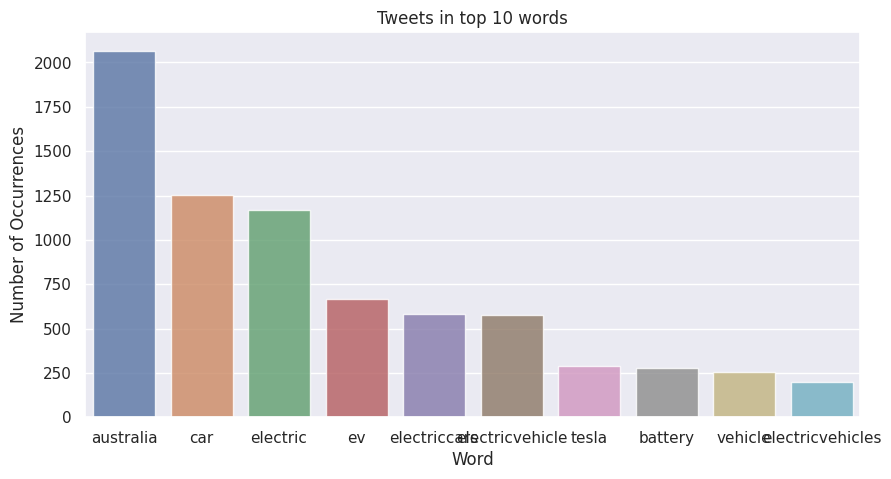

In [101]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [102]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


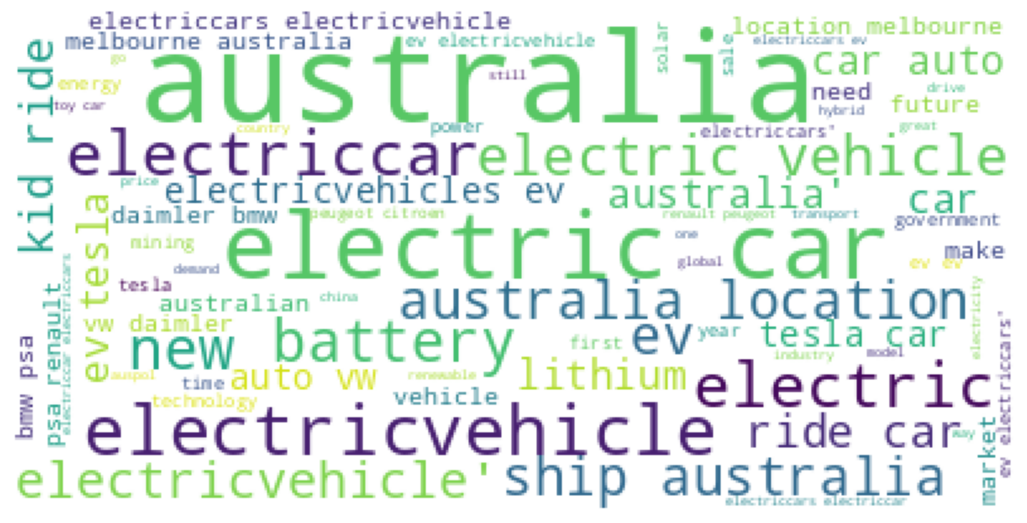

In [103]:
corpus = list(df_twitter['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the word cloud we could identify that terms australia, car, electric, ev has been mentioned frequently. this do not provide much insights Therefore,we shal  remove high frequent yet non-insightful words alongside the twitter specific words.


# Remove common words

In [104]:
# Creating a list of custom stopwords
new_words_to_remove = ["australia",  "car", "electricvehicle", "vehicle", "ev", "electric", "electriccars"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# Remove common words
# We will use lambda function here.
df_twitter['tweet_lemmatized'] = df_twitter['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
# Look at the top 10 words
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


australia           2067
car                 1252
electric            1167
ev                   666
electriccars         583
electricvehicle      576
tesla                290
battery              275
vehicle              254
electricvehicles     199
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


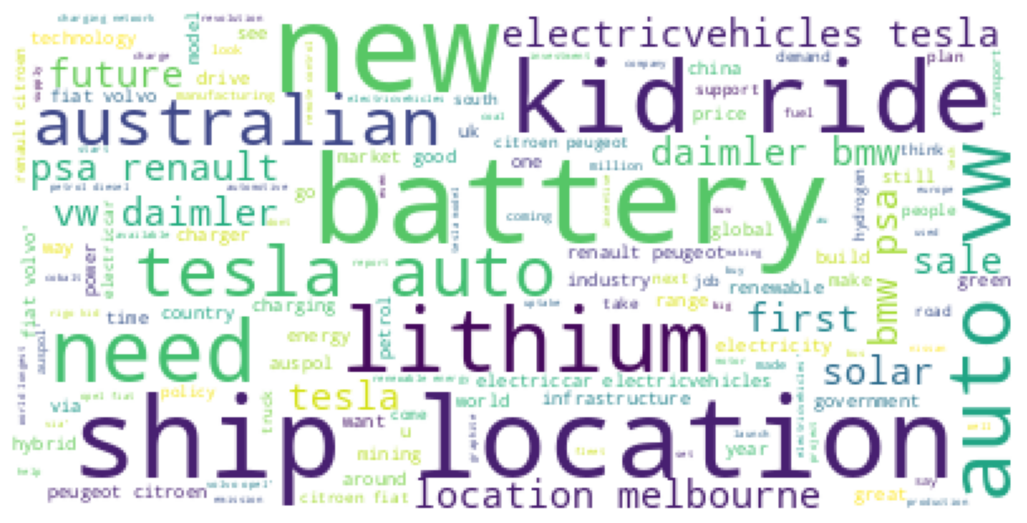

In [107]:
corpus = list(df_twitter['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Bigrams and Trigrams

# Bigrams

In [108]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
bigrams_twitter = get_ngrams(df_twitter['tweet_lemmatized'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
bigrams_twitter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('ship location', 155),
 ('kid ride', 124),
 ('auto vw', 87),
 ('tesla auto', 85),
 ('electricvehicles tesla', 78),
 ('location melbourne', 74),
 ('vw daimler', 72),
 ('daimler bmw', 71),
 ('fiat volvo', 70),
 ('bmw psa', 68),
 ('psa renault', 66),
 ('electriccar electricvehicles', 63),
 ('renault peugeot', 49),
 ('peugeot citroen', 48),
 ('citroen fiat', 36),
 ('citroen peugeot', 34),
 ('renault citroen', 33),
 ('charging network', 28),
 ('renewable energy', 27),
 ('petrol diesel', 27),
 ('volvo opel', 26),
 ('rigo kid', 25),
 ('remote control', 25),
 ('opel fiat', 24),
 ('tesla model', 23),
 ('world longest', 22),
 ('charging station', 21),
 ('climate climatechange', 21),
 ('lithium battery', 19),
 ('green deal', 17),
 ('ride toy', 17),
 ('vw mercedes', 17),
 ('mercedes bmw', 17),
 ('bmw renault', 17),
 ('peugeot opel', 17),
 ('longest highway', 17),
 ('climatechange parisagreement', 16),
 ('via advice', 16),
 ('toy battery', 16),
 ('solarpower solarenergy', 16),
 ('luxury tax', 15)

Convert bigrams to a dataframe with column names bi-gram and frequency.

In [111]:
bigrams_twitter_df = pd.DataFrame(bigrams_twitter)
bigrams_twitter_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

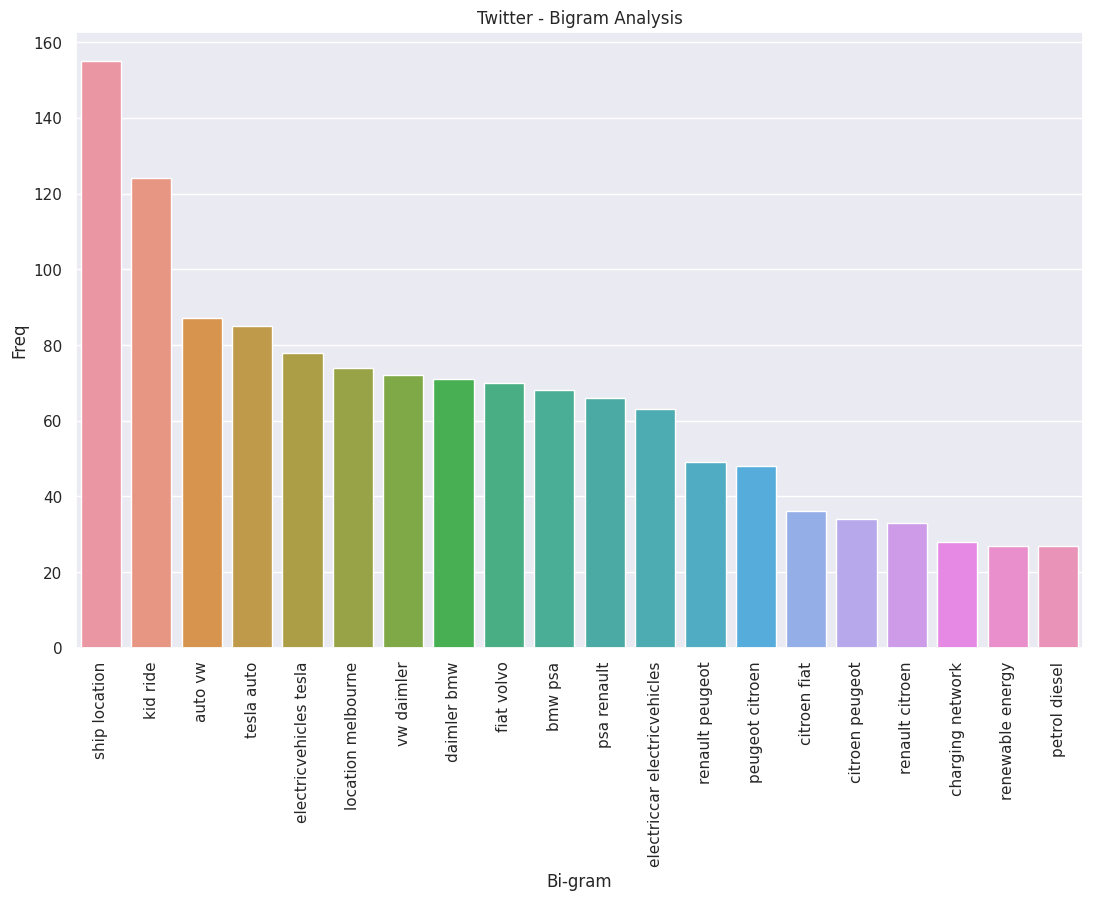

In [112]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_twitter_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Twitter - Bigram Analysis')
plt.show()

**Trigrams**

In [113]:
trigrams_twitter = get_ngrams(df_twitter['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Convert trigrams to a dataframe with column names tri-gram and frequency.

In [114]:
trigrams_twitter_df = pd.DataFrame(trigrams_twitter)
trigrams_twitter_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in 

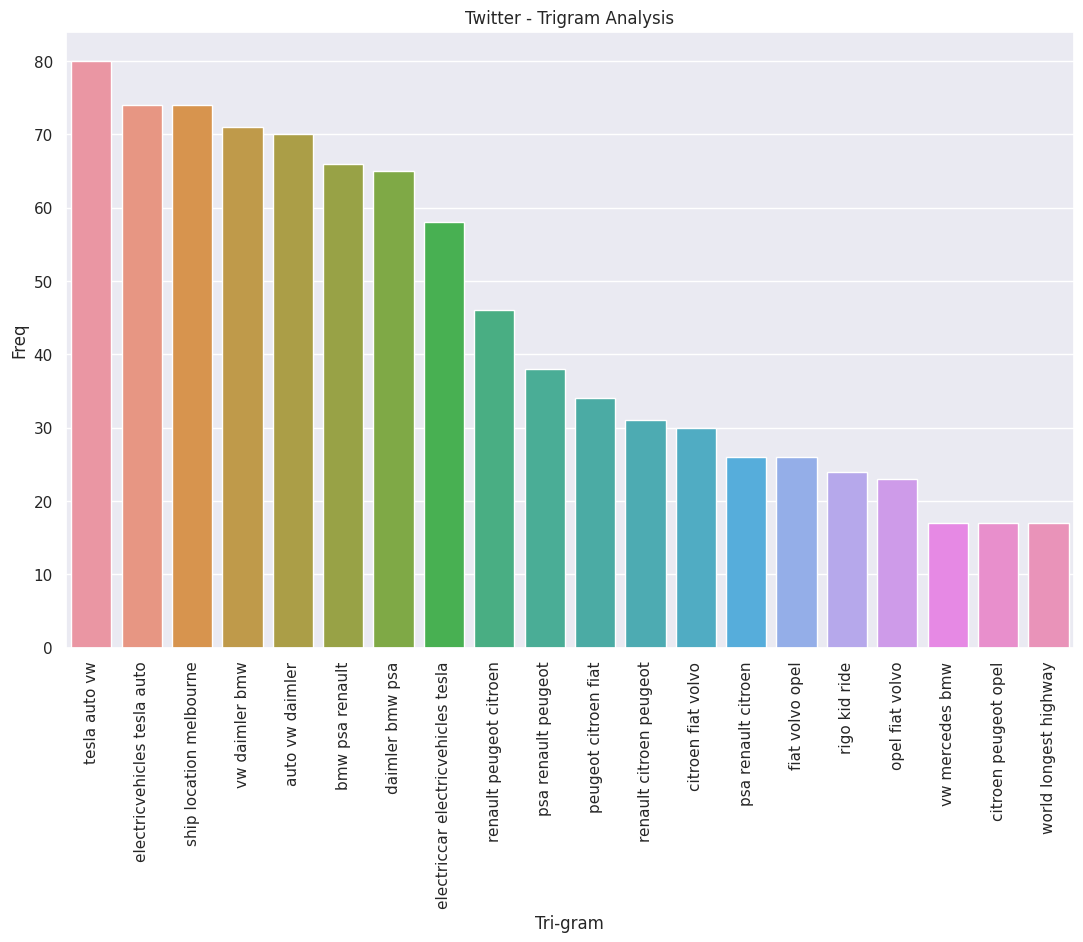

In [115]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_twitter_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Twitter - Trigram Analysis')
plt.show()

# Temporal Analysis

In [138]:
df_twitter_date_wise = df_twitter.groupby(['date'])['tweet_lemmatized'].count().reset_index(name='tweet_count_twitter').set_index('date')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
df_twitter_date_wise.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_count_twitter
date,
2020-08-01,8
2020-08-02,4
2020-08-03,2
2020-08-04,4
2020-08-05,3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


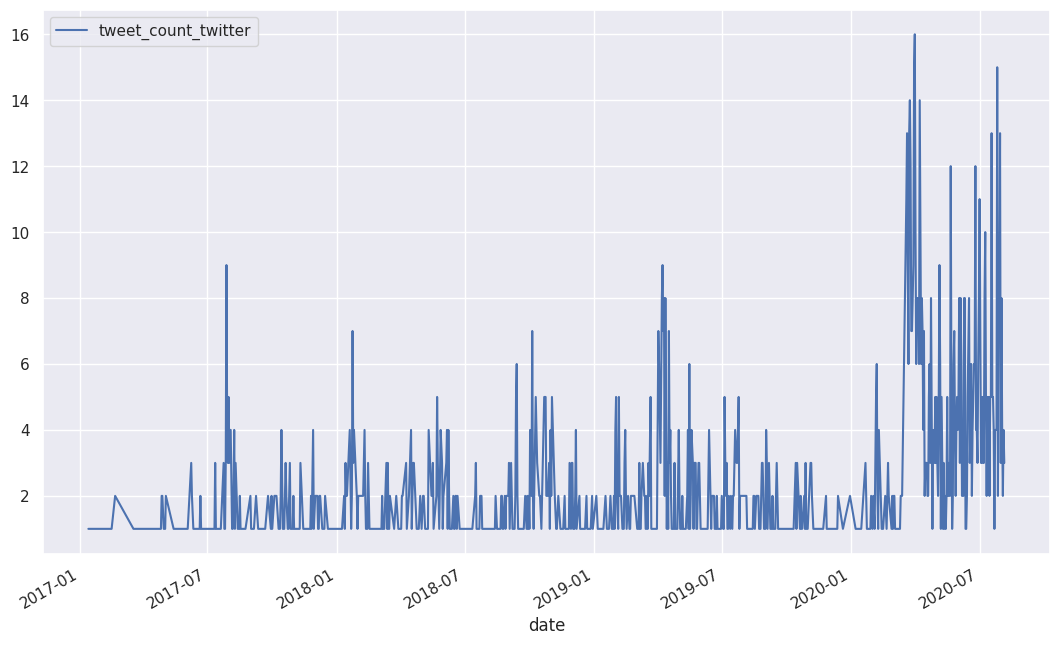

In [142]:
ax = df_twitter_date_wise.plot()
plt.show()

# Sentiment Analysis



In [116]:
# Extract sentiments from the tweets
df_twitter['sentiment'] = df_twitter['tweet_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
# Display first 50 tweets with respective sentiment value
df_twitter[['tweet_lemmatized', 'sentiment']].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_lemmatized,sentiment
0,brilliant good company affordable imported jap...,0.800000
1,time wake risk becoming cuba south pacific tou...,0.293182
2,want see stock appearing race not hybrid f2 su...,0.244444
3,never thought id nerding sale site part work r...,0.500000
4,peugeot missing mercedes eq got year award aus...,0.100000
5,wow imagine able lease aud165month,0.300000
6,never use system apple arecoming nation create...,0.117500
7,rangerovers evoque come new hybrid twist expec...,0.112121
8,impact lack policy nominee uk year award le ha...,0.311111
9,sell pay significantly odds order virtue signa...,0.069444


In [118]:
df_twitter.groupby(['date'])['sentiment'].mean()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2017-01-13    0.000000
2017-01-16    0.000000
2017-01-19    0.000000
2017-02-08    0.000000
2017-02-15    0.000000
                ...   
2020-08-01    0.045407
2020-08-02    0.229861
2020-08-03    0.211616
2020-08-04    0.254375
2020-08-05    0.445875
Name: sentiment, Length: 741, dtype: float64

In [119]:
df_senti_twitter = df_twitter.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment').set_index('date')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


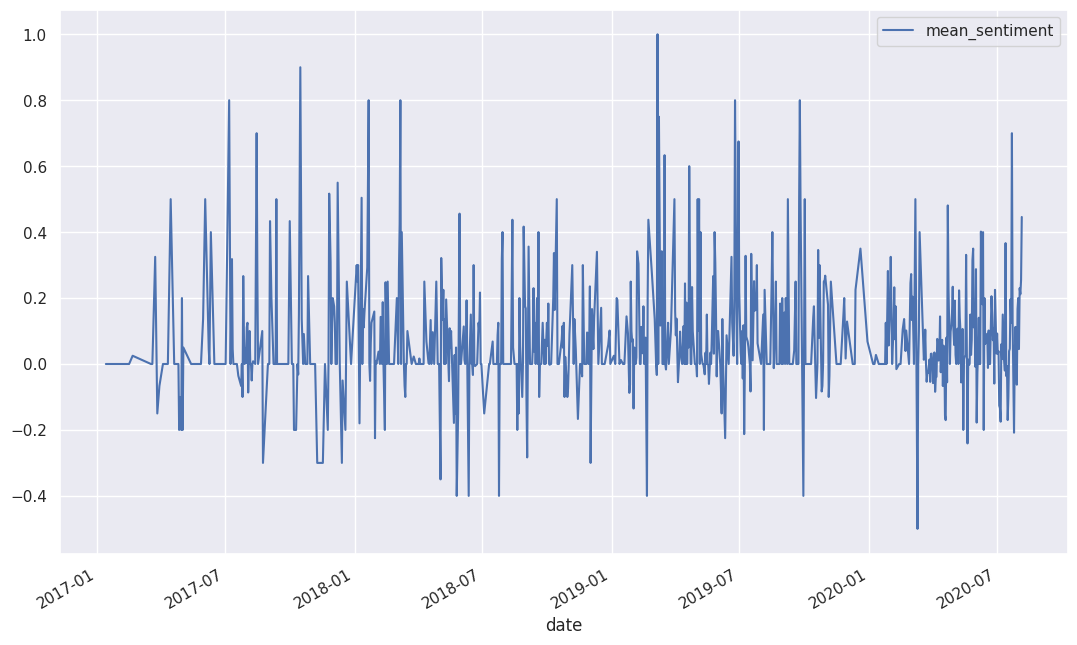

In [146]:
# Plot twitter sentiment with twitter id
ax = df_senti_twitter.plot()
plt.savefig('temporal_sentiment_v2.png', dpi=1200)


# Topic Modeling

We will conduct a topic modeling using a algorithm named - LDA (Latent Dirichlet Allocation)

In [121]:
# Setting up the environment for LDA algorithm.

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


creating the text corpus.

In [122]:
# Convert the tweets as the text corpus.
corpus = list(df_twitter['tweet_lemmatized'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['brilliant good company affordable imported japan nissan',
 'time wake risk becoming cuba south pacific tourist come gape osborne effect new sale six year fitz',
 'want see stock appearing race not hybrid f2 super australiai think somebody many wish list carhay idea make remote would betterhay make also',
 'never thought id nerding sale site part work really enjoyed researching writing piece dr christopher munnings expert learn evuptake covid changing industry',
 'peugeot missing mercedes eq got year award australian motoring magazine wheel eq cost surely better price cheapest undercut']

In [124]:
# Tokenization
twitter_texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
twitter_texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['brilliant', 'good', 'company', 'affordable', 'imported', 'japan', 'nissan'],
 ['time',
  'wake',
  'risk',
  'becoming',
  'cuba',
  'south',
  'pacific',
  'tourist',
  'come',
  'gape',
  'osborne',
  'effect',
  'new',
  'sale',
  'six',
  'year',
  'fitz'],
 ['want',
  'see',
  'stock',
  'appearing',
  'race',
  'not',
  'hybrid',
  'f2',
  'super',
  'australiai',
  'think',
  'somebody',
  'many',
  'wish',
  'list',
  'carhay',
  'idea',
  'make',
  'remote',
  'would',
  'betterhay',
  'make',
  'also'],
 ['never',
  'thought',
  'id',
  'nerding',
  'sale',
  'site',
  'part',
  'work',
  'really',
  'enjoyed',
  'researching',
  'writing',
  'piece',
  'dr',
  'christopher',
  'munnings',
  'expert',
  'learn',
  'evuptake',
  'covid',
  'changing',
  'industry'],
 ['peugeot',
  'missing',
  'mercedes',
  'eq',
  'got',
  'year',
  'award',
  'australian',
  'motoring',
  'magazine',
  'wheel',
  'eq',
  'cost',
  'surely',
  'better',
  'price',
  'cheapest',
  'undercut

In [126]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(twitter_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'twitter.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
print(twitter_texts[0])
print('alphabetically sorted', sorted(twitter_texts[0]))

['brilliant', 'good', 'company', 'affordable', 'imported', 'japan', 'nissan']
alphabetically sorted ['affordable', 'brilliant', 'company', 'good', 'imported', 'japan', 'nissan']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
print(twitter_texts[1])
print('alphabetically sorted', sorted(twitter_texts[1]))

['time', 'wake', 'risk', 'becoming', 'cuba', 'south', 'pacific', 'tourist', 'come', 'gape', 'osborne', 'effect', 'new', 'sale', 'six', 'year', 'fitz']
alphabetically sorted ['becoming', 'come', 'cuba', 'effect', 'fitz', 'gape', 'new', 'osborne', 'pacific', 'risk', 'sale', 'six', 'south', 'time', 'tourist', 'wake', 'year']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Print the dictionary
print(dictionary.token2id)

{'affordable': 0, 'brilliant': 1, 'company': 2, 'good': 3, 'imported': 4, 'japan': 5, 'nissan': 6, 'becoming': 7, 'come': 8, 'cuba': 9, 'effect': 10, 'fitz': 11, 'gape': 12, 'new': 13, 'osborne': 14, 'pacific': 15, 'risk': 16, 'sale': 17, 'six': 18, 'south': 19, 'time': 20, 'tourist': 21, 'wake': 22, 'year': 23, 'also': 24, 'appearing': 25, 'australiai': 26, 'betterhay': 27, 'carhay': 28, 'f2': 29, 'hybrid': 30, 'idea': 31, 'list': 32, 'make': 33, 'many': 34, 'not': 35, 'race': 36, 'remote': 37, 'see': 38, 'somebody': 39, 'stock': 40, 'super': 41, 'think': 42, 'want': 43, 'wish': 44, 'would': 45, 'changing': 46, 'christopher': 47, 'covid': 48, 'dr': 49, 'enjoyed': 50, 'evuptake': 51, 'expert': 52, 'id': 53, 'industry': 54, 'learn': 55, 'munnings': 56, 'nerding': 57, 'never': 58, 'part': 59, 'piece': 60, 'really': 61, 'researching': 62, 'site': 63, 'thought': 64, 'work': 65, 'writing': 66, 'australian': 67, 'award': 68, 'better': 69, 'cheapest': 70, 'cost': 71, 'eq': 72, 'got': 73, 'mag

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in twitter_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
tweet_id = 0
print(twitter_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(twitter_texts[tweet_id])) # each token is represented as a id from a dictionary

['brilliant', 'good', 'company', 'affordable', 'imported', 'japan', 'nissan']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



## Generate the topic model

In [132]:

# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defining the number of topics caputured through LDA.

In [134]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Building the LDA topic model.

In [135]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"battery" + 0.008*"tesla" + 0.007*"lithium" + 0.007*"electricvehicles" + 0.006*"energy" + 0.006*"mining"'),
 (1,
  '0.010*"ship" + 0.010*"battery" + 0.010*"location" + 0.010*"kid" + 0.010*"tesla" + 0.009*"ride"'),
 (2,
  '0.009*"energy" + 0.007*"solar" + 0.007*"electricvehicles" + 0.005*"government" + 0.005*"behind" + 0.005*"charging"'),
 (3,
  '0.013*"kid" + 0.011*"battery" + 0.011*"ride" + 0.009*"location" + 0.009*"ship" + 0.008*"tesla"'),
 (4,
  '0.012*"tesla" + 0.008*"battery" + 0.007*"electricvehicles" + 0.006*"charging" + 0.006*"lithium" + 0.006*"market"'),
 (5,
  '0.018*"battery" + 0.010*"electricvehicles" + 0.007*"tesla" + 0.006*"electriccar" + 0.005*"energy" + 0.005*"bmw"'),
 (6,
  '0.009*"new" + 0.008*"battery" + 0.007*"location" + 0.007*"ship" + 0.007*"tesla" + 0.007*"ride"'),
 (7,
  '0.014*"tesla" + 0.012*"location" + 0.012*"ship" + 0.011*"ride" + 0.010*"kid" + 0.008*"melbourne"'),
 (8,
  '0.009*"new" + 0.009*"tesla" + 0.008*"lithium" + 0.006*"auto" + 0.005*"n

# Interactive topic analyzer

In [137]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='pca')
panel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.051808  0.030481       1        1  15.193395
9     -0.001529 -0.074625       2        1  14.656572
2      0.042331 -0.075327       3        1  13.098959
3     -0.070750  0.053537       4        1  12.771702
4      0.074130  0.054916       5        1  10.957281
0      0.088578  0.051849       6        1  10.287351
7     -0.103705 -0.005441       7        1   6.778894
5      0.017200 -0.030844       8        1   6.057920
6      0.000361  0.048075       9        1   5.101204
8      0.005193 -0.052622      10        1   5.096722, topic_info=                  Term       Freq      Total Category  logprob  loglift
2004               kid   9.000000   9.000000  Default  30.0000  30.0000
387               ship   9.000000   9.000000  Default  29.0000  29.0000
968               ride   9.000000   9.000000  Default  28.0000  28.0000
2352          location   9.000000   9.000000  Default  27.0000  27.0000
233            battery  16.000000  16.000000  Default  26.0000  26.0000
...                ...        ...        ...      ...      ...      ...
927   electricvehicles   0.366942  12.302066  Topic10  -5.5548  -0.5357
1490                vw   0.313332   5.999017  Topic10  -5.7128   0.0245
311             future   0.286498   4.714038  Topic10  -5.8023   0.1760
2076              opel   0.271944   3.413929  Topic10  -5.8545   0.4465
233            battery   0.277756  16.419018  Topic10  -5.8333  -1.1029

[782 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2686      1  0.295716         12v
2686      4  0.295716         12v
2686      7  0.295716         12v
0         4  0.757928  affordable
581       1  0.406031      around
...     ...       ...         ...
23        2  0.200223        year
23        3  0.200223        year
23        4  0.200223        year
23        5  0.200223        year
23        6  0.200223        year

[330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 3, 4, 5, 1, 8, 6, 7, 9])